In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
users = pd.read_csv(r"C:\Users\Владимир\Desktop\lesson_3\user_data.csv")

In [3]:
logs = pd.read_csv(r"C:\Users\Владимир\Desktop\lesson_3\logs.csv")

In [46]:
success = logs.query('success == True')\
    .groupby('client', as_index = False)\
    .agg({'success': 'count'})\
    .sort_values(by = 'success',ascending = False )
success.query('success == 41').sort_values(by = 'client', ascending = True).client.tolist()

[12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584]

In [47]:
logs

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
2,35604,False,phone,1585459894
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
...,...,...,...,...
4495,64496,False,computer,1585459072
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121
4498,52880,False,phone,1585455362


In [59]:
logs.query('success == True')\
    .groupby('platform',as_index = False)\
    .agg({'success':'count'})\
    .sort_values(by = 'success', ascending = False)
#logs.query('success == True').platform.value_counts()

,platform,success
1,phone,2019
0,computer,1090
2,tablet,180


In [60]:
users

,client,premium,age
0,46346,False,58
1,4391,False,55
2,27372,False,64
3,11989,False,44
4,60664,False,49
...,...,...,...
2949,19411,False,29
2950,61579,False,50
2951,61221,True,64
2952,29863,False,46


In [4]:
users_logs = users.merge(logs, on ='client')

In [63]:
users_logs.query('premium == True').platform.value_counts()

platform
phone       246
computer    150
tablet       24
Name: count, dtype: int64

C:\Users\Владимир\AppData\Local\Temp\ipykernel_5392\2844802531.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(users_logs.query('premium == True').age)
C:\Users\Владимир\AppData\Local\Temp\ipykernel_5392\2844802531.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(users_logs.query('premium

<Axes: xlabel='age', ylabel='Density'>

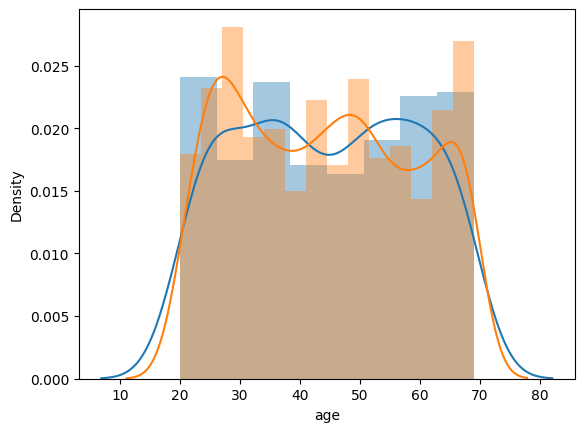

In [67]:
sns.distplot(users_logs.query('premium == True').age)
sns.distplot(users_logs.query('premium == False').age)

C:\Users\Владимир\AppData\Local\Temp\ipykernel_5392\678368903.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(users_logs.query('premium == True').age, ax = ax[0], color = 'green')
C:\Users\Владимир\AppData\Local\Temp\ipykernel_5392\678368903.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

<Axes: xlabel='age', ylabel='Density'>

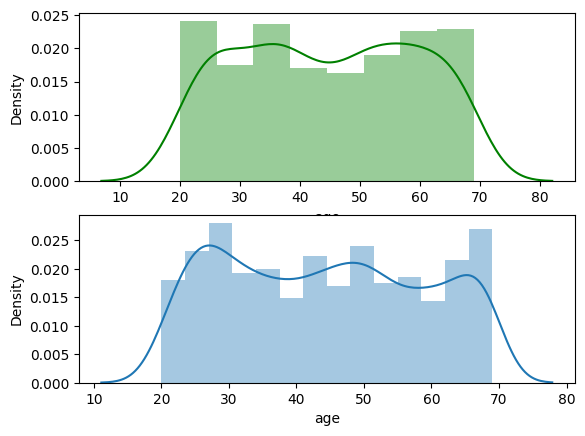

In [73]:
fig, ax = plt.subplots(nrows = 2, ncols = 1)
sns.distplot(users_logs.query('premium == True').age, ax = ax[0], color = 'green')
sns.distplot(users_logs.query('premium == False').age, ax = ax[1])

In [18]:
success_on_computer = users_logs\
                                .query('success == True and platform == "computer"')\
                                .groupby('age',as_index = False).agg({'success':'sum'})

<Axes: xlabel='age', ylabel='success'>

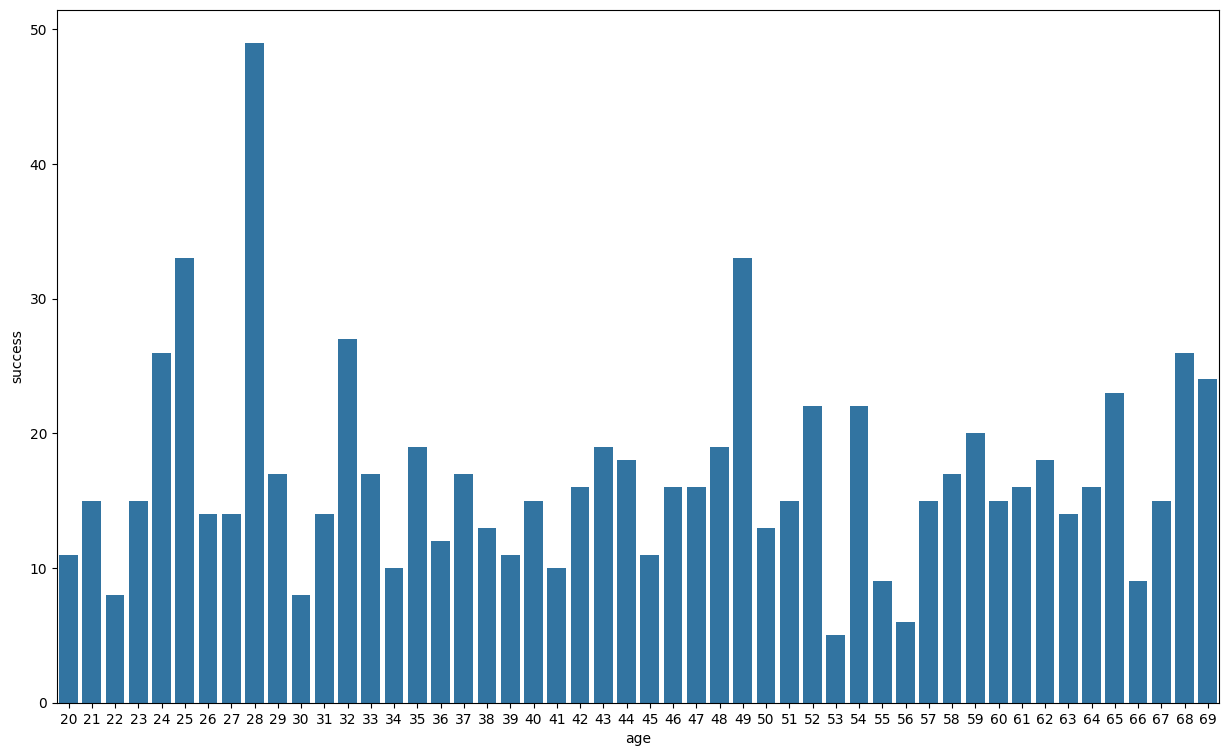

In [33]:
plt.figure(figsize=(15,9))
sns.barplot(x = success_on_computer.age, y = success_on_computer.success)

<Axes: ylabel='count'>

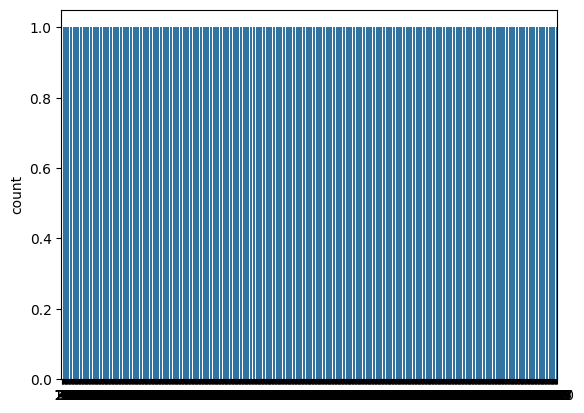

In [35]:
success_on_computer = users_logs\
                                .query('success == True and platform == "computer"')
sns.countplot(success_on_computer.age)